In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

/home/kunal/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df = pd.read_csv('./Datasets/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Text(0, 0.5, 'Age')

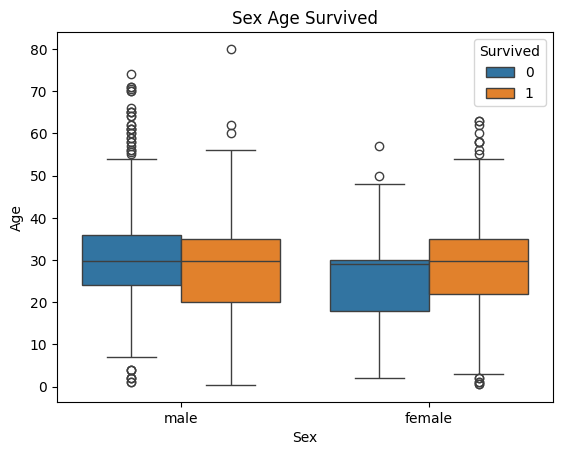

In [7]:
sb.boxplot(x = 'Sex', y = 'Age', hue = 'Survived', data = df)
plt.title('Sex Age Survived')
plt.xlabel('Sex')
plt.ylabel('Age')

### Observations and Inferences:

#### 1. Age Distribution by Gender:
- The box plot shows the spread of ages for each gender. 
- You might observe that the age range for males and females is relatively similar, but the median age might differ slightly between genders.

#### 2. Survival and Age:
- The box plot will display whether there are any notable differences in the age distribution for survivors vs non-survivors within each gender.
- For instance, it’s possible that females had a higher survival rate in the Titanic disaster, and this might be reflected in the box plot with a higher median age for female survivors compared to non-survivors.
- Similarly, the median age of male survivors may be lower than that of non-survivors.

#### 3. Outliers:
- Outliers in age (very young or very old) can be identified in the box plot, which may highlight interesting cases such as children or elderly passengers who survived or did not survive.


Text(0, 0.5, 'Age')

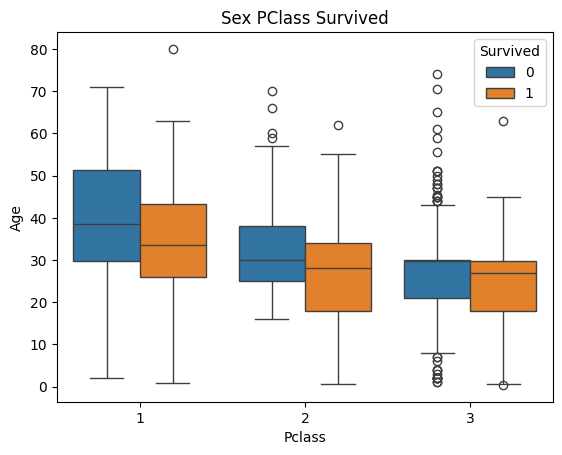

In [8]:
sb.boxplot(x = 'Pclass', y = 'Age', hue = 'Survived', data = df)
plt.title('Sex PClass Survived')
plt.xlabel('Pclass')
plt.ylabel('Age')

<Axes: >

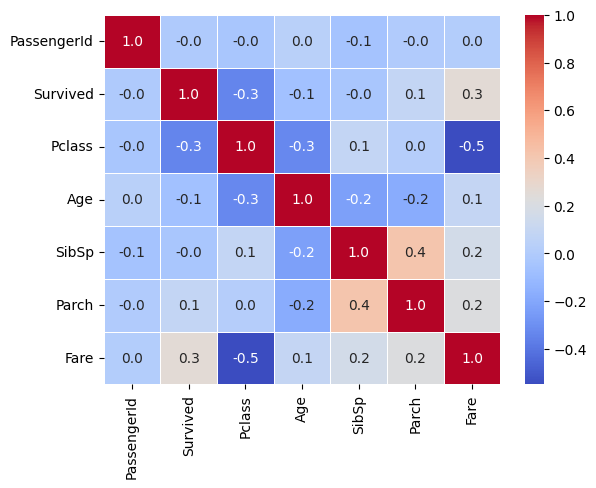

In [9]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_df.corr()
sb.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.1f', linewidths=0.5)